# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: 
- _Question 1: Normal how long do users use the bike-share service every time?_ 
- _Question 2: What is the ration of diferent user type registered for each city?_
- _Question 3: Is there any difference between the 3 cities for using the bike-share service?_

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [1]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def print_first_point(filename):
    """ This function prints and returns the first data point (second row) from
    a csv file that includes a header row."""
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader = csv.DictReader(f_in)
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip = trip_reader.__next__()
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint(first_trip)
    # output city name and first trip for later testing
    return (city, first_trip)
# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]
# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [3]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    # YOUR CODE HERE
    if city == "NYC" or city == "Chicago":
        duration = int(datum['tripduration'])/60
    elif city == "Washington":
        duration = int(datum['Duration (ms)'])/60000
    return duration

# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [4]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    
    # YOUR CODE HERE
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    if city == 'NYC':
        dt = datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M:%S")
        month = dt.month
        hour = dt.hour
        day_of_week = weekdays[dt.weekday()]
    elif city == 'Washington':
        dt = datetime.strptime(datum['Start date'],"%m/%d/%Y %H:%M")
        month = dt.month
        hour = dt.hour
        day_of_week = weekdays[dt.weekday()]
    elif city == 'Chicago':
        dt = datetime.strptime(datum['starttime'], "%m/%d/%Y %H:%M")
        month = dt.month
        hour = dt.hour
        day_of_week = weekdays[dt.weekday()]
    return (month, hour, day_of_week)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [5]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    
    # YOUR CODE HERE
    if city == 'NYC' or city == 'Chicago':
        user_type = datum['usertype']
    elif city == 'Washington':
        if datum['Member Type'] == 'Registered':
            user_type = 'Subscriber'
        elif datum['Member Type'] == 'Casual':
            user_type = 'Customer'    
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [6]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)
        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}
            new_point['duration'] = duration_in_mins(row,city)
            new_point['month'] = time_of_trip(row,city)[0]
            new_point['hour'] = time_of_trip(row,city)[1]
            new_point['day_of_week'] = time_of_trip(row,city)[2]
            new_point['user_type'] = type_of_user(row, city)
            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            

            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            trip_writer.writerow(new_point)
            

In [7]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
#     print_first_point(filenames['out_file'])

> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: 
**NYC** has the highest number of trips; **NYC** has the highest proportion of trips made by subscribers; **Chicago** has the highest proportion of trips made by short-term customers.

In [8]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        p_subscribers = n_subscribers / n_total
        p_customers = n_customers / n_total
        P_subscribers ='{:.1%}'.format(p_subscribers)
        P_customers ='{:.1%}'.format(p_customers)
        # return tallies as a tuple
        return(n_subscribers, n_customers, n_total,P_subscribers, P_customers)
               

In [9]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3. ##

city_info = {'Washington': {'out_file': './data/Washington-2016-Summary.csv'},
             'NYC': {'out_file': './data/NYC-2016-Summary.csv'},
            'Chicago': {'out_file': './data/Chicago-2016-Summary.csv'},
            'BayArea':{'out_file':'./examples/BayArea-Y3-Summary.csv'}}

for city, filenames in city_info.items():
    print(city, number_of_trips(filenames['out_file']))

Washington (51753, 14573, 66326, '78.0%', '22.0%')
NYC (245896, 30902, 276798, '88.8%', '11.2%')
Chicago (54982, 17149, 72131, '76.2%', '23.8%')
BayArea (5666, 633, 6299, '90.0%', '10.0%')


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: 
- The average trip length for Washington is 18 minutes, for NYC is 15 minutes, for Chicago is 16 minutes;
- 10.8% of rides in Washington are longer than 30 minutes; 7.3% of riders in NYC are longer than 30 mintures; 8.3% of riders in Chicago are longer than 30 minutes;

In [10]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##
def average_trip_length(filename):
    with open(filename,'r') as f_in:
        reader = csv.DictReader(f_in)
        n_over30 = 0
        n_less30 = 0
        total_trip_over30 = 0
        total_trip_less30 = 0
        for row in reader:
            if float(row['duration']) > 30:
                n_over30 += 1
                total_trip_over30 += float(row['duration'])
            elif float(row['duration']) <= 30:
                n_less30 += 1
                total_trip_less30 += float(row['duration'])
        total_user = n_over30 + n_less30
        total_trip = total_trip_over30 + total_trip_less30
        average_trip = int(total_trip/total_user)
        p_over30 = n_over30/total_user
        P_over30 ='{:.1%}'.format(p_over30)
        return (average_trip, P_over30)
    
city_info = {'Washington': {'out_file': './data/Washington-2016-Summary.csv'},
             'NYC': {'out_file': './data/NYC-2016-Summary.csv'},
            'Chicago': {'out_file': './data/Chicago-2016-Summary.csv'},
            'BayArea':{'out_file':'./examples/BayArea-Y3-Summary.csv'}}

for city, filenames in city_info.items():
    print(city, average_trip_length(filenames['out_file']))

Washington (18, '10.8%')
NYC (15, '7.3%')
Chicago (16, '8.3%')
BayArea (14, '3.5%')


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: 
- For **Washington**, the average Subscriber trip duration is 12.5 minutes and the average Customer trip duration is 41.7 minutes. 
- For **NYC**, the average Subscriber trip duration is 13.7 minutes and the average Customer trip duration is 33.0 minutes. 
- For **Chicago**, the average Subscriber trip duration is 12.1 minutes and the average Customer trip duration is 31.0 minutes. 

In [11]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?                                                ##

def average_usertype(filename):
    with open(filename,'r') as f_in:
        reader = csv.DictReader(f_in)
        T_sub_trip = 0
        T_cus_trip = 0
        n_sub = 0
        n_cus = 0
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_sub += 1
                T_sub_trip += float(row['duration'])
            elif row['user_type'] == 'Customer':
                n_cus += 1
                T_cus_trip += float(row['duration'])
        a_sub_trip = T_sub_trip / n_sub
        A_sub_trip = "{0:.1f}".format(a_sub_trip)
        a_cus_trip = T_cus_trip / n_cus
        A_cus_trip ="{0:.1f}".format(a_cus_trip)
        return (A_sub_trip, A_cus_trip)
    
city_info = {'Washington': {'out_file': './data/Washington-2016-Summary.csv'},
             'NYC': {'out_file': './data/NYC-2016-Summary.csv'},
            'Chicago': {'out_file': './data/Chicago-2016-Summary.csv'},
            'BayArea':{'out_file':'./examples/BayArea-Y3-Summary.csv'}}

for city, filenames in city_info.items():
    print(city, average_usertype(filenames['out_file']))

Washington ('12.5', '41.7')
NYC ('13.7', '33.0')
Chicago ('12.1', '31.0')
BayArea ('9.5', '54.6')


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

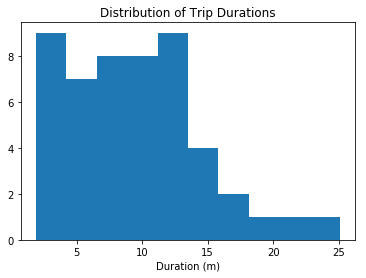

In [12]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

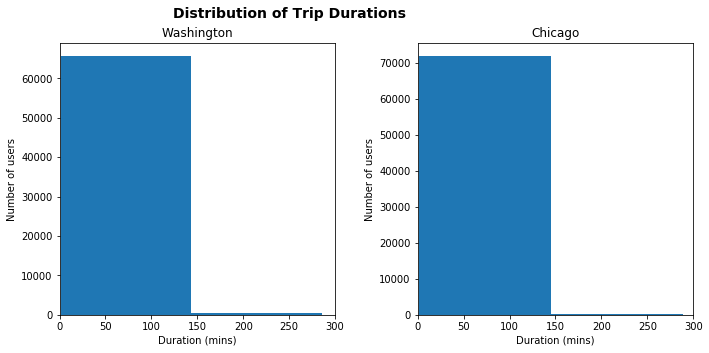

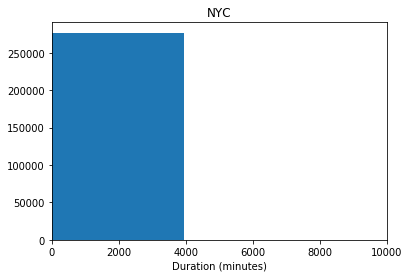

In [13]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##
def histo_gram(filename):
    with open(filename,'r') as f_in:
        reader = csv.DictReader(f_in)
        trip_time = []
        for row in reader:
            trip_time.append(float(row['duration']))
        return trip_time


city_info = ['./data/Washington-2016-Summary.csv',
            './data/Chicago-2016-Summary.csv']
city_name=['Washington','Chicago','NYC']
fig, axes = plt.subplots(1,2,figsize=(8,5))
fig.suptitle('Distribution of Trip Durations', fontsize=14, fontweight='bold')
for i, ax in enumerate(axes.flatten()):
    ax.hist(histo_gram(city_info[i]))
    ax.set_title(str(city_name[i]))
    ax.set_ylabel('Number of users')
    ax.set_xlabel('Duration (mins)')
    ax.set_xlim(0,300)

    
plt.subplots_adjust(left=0.1,right=1.2,wspace=0.3)
plt.show()

filename='./data/NYC-2016-Summary.csv'
plt.hist(histo_gram(filename))
plt.title('NYC')
plt.xlabel('Duration (minutes)')
plt.xlim(0,10000)
plt.show()

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: 
- The peak duration distribution of Subscriber in Washington is 5-10 minutes, for customers is 15-20 minutes


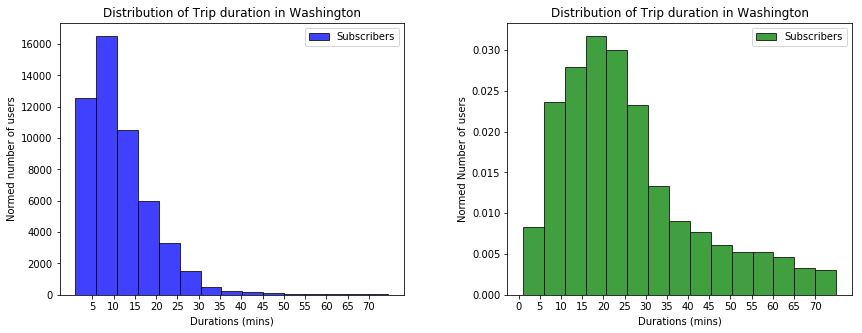

In [14]:
## Use this and additional cells to answer Question 5. ##
import numpy as np
import matplotlib.mlab as mlab
def histo_sub(filename):
    with open(filename,'r') as f_in:
        reader = csv.DictReader(f_in)
        trip_time = []
        for row in reader:
            if row['user_type'] == 'Subscriber':
                if float(row['duration']) <= 75:
                    trip_time.append(float(row['duration']))
        return (trip_time)   
def histo_cus(filename):
    with open(filename,'r') as f_in:
        reader = csv.DictReader(f_in)
        trip_time = []
        for row in reader:
            if row['user_type'] == 'Customer':
                if float(row['duration']) <= 75:
                    trip_time.append(float(row['duration']))
        return (trip_time)

filename='./data/Washington-2016-Summary.csv'
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
n, bins, patches = ax1.hist(histo_sub(filename),15,label='Subscribers',facecolor='blue',edgecolor='black', alpha=0.75, align='mid')
plt.xticks(np.arange(5,75,5))
plt.xlabel('Durations (mins)')
plt.ylabel('Normed number of users')
plt.title('Distribution of Trip duration in Washington')
plt.legend()

ax2 = fig.add_subplot(122)
n, bins, patches = ax2.hist(histo_cus(filename),15, normed=1,label='Subscribers',facecolor='green',edgecolor='black', alpha=0.75, align='mid')
plt.xticks(np.arange(5,75,5))
plt.xlabel('Durations (mins)')
plt.ylabel('Normed Number of users')
plt.title('Distribution of Trip duration in Washington')
plt.legend()
plt.xticks(np.arange(0,75,5))
plt.subplots_adjust(left=0.1,right=1.2,wspace=0.3)
plt.show();

<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: Replace this text with your responses and include a visualization below!

In [1]:
# import needed packages
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline 

In [101]:
df_Wcity = pd.read_csv('./data/Washington-2016-Summary.csv')

In [102]:
df_Wcity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66326 entries, 0 to 66325
Data columns (total 5 columns):
duration       66326 non-null float64
month          66326 non-null int64
hour           66326 non-null int64
day_of_week    66326 non-null object
user_type      66326 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 2.5+ MB


In [103]:
# create city array for Washington 
city_Washington = np.repeat('Washington',66326)

In [104]:
df_Wcity['city'] = city_Washington

In [105]:
df_Ncity = pd.read_csv('./data/NYC-2016-Summary.csv')

In [106]:
df_Ncity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276798 entries, 0 to 276797
Data columns (total 5 columns):
duration       276798 non-null float64
month          276798 non-null int64
hour           276798 non-null int64
day_of_week    276798 non-null object
user_type      276081 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 10.6+ MB


In [107]:
# create city array for NYC
city_NYC = np.repeat('NYC',276798)

In [108]:
df_Ncity['city'] = city_NYC

In [109]:
df_Ccity = pd.read_csv('./data/Chicago-2016-Summary.csv')

In [110]:
df_Ccity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72131 entries, 0 to 72130
Data columns (total 5 columns):
duration       72131 non-null float64
month          72131 non-null int64
hour           72131 non-null int64
day_of_week    72131 non-null object
user_type      72131 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 2.8+ MB


In [111]:
# create city array for Chicago
city_Chicago = np.repeat('Chicago', 72131)

In [112]:
df_Ccity['city']=city_Chicago

In [113]:
# create new dataframe named US_bikeshare, and append the dataframes
US_bikeshare = df_Wcity.append(df_Ncity, ignore_index = True)

In [114]:
US_bikeshare = US_bikeshare.append(df_Ccity,ignore_index=True)

In [115]:
US_bikeshare.to_csv('./data/US_bikeshare.csv', index = False)

In [2]:
US_bikeshare = pd.read_csv('./data/US_bikeshare.csv')

In [3]:
US_bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415255 entries, 0 to 415254
Data columns (total 6 columns):
duration       415255 non-null float64
month          415255 non-null int64
hour           415255 non-null int64
day_of_week    415255 non-null object
user_type      414538 non-null object
city           415255 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 19.0+ MB


In [4]:
US_bikeshare.groupby(['user_type','city']).mean()['duration']

user_type   city      
Customer    Chicago       30.979781
            NYC           32.982004
            Washington    41.678031
Subscriber  Chicago       12.067202
            NYC           13.680791
            Washington    12.528120
Name: duration, dtype: float64

- From the result above we can know that:
    - the means of duration for Cutomer users are 30.979781(Chicago),32.982004(NYC),41.678031(Washington), where Washington has the highest mean;
    - the means of duration for Subscriber users are 12.067202(Chicago),13.680791(NYC),12.528120(Washington), where the three cities are roughly the same;

In [5]:
US_bikeshare.groupby(['user_type','city'])['duration'].describe()

count       mean         std       min        25%  \
user_type  city                                                               
Customer   Chicago      17149.0  30.979781   52.683638  1.000000  15.200000   
           NYC          30185.0  32.982004  143.051997  1.016667  13.916667   
           Washington   14573.0  41.678031   65.596410  1.024500  15.581067   
Subscriber Chicago      54982.0  12.067202   21.560431  1.000000   5.950000   
           NYC         245896.0  13.680791   97.904245  1.016667   6.033333   
           Washington   51753.0  12.528120   24.852879  1.010550   6.008250   

                             50%        75%           max  
user_type  city                                            
Customer   Chicago     22.566667  31.750000   1439.416667  
           NYC         21.233333  29.083333  12099.150000  
           Washington  24.896717  45.666333   1422.516367  
Subscriber Chicago      9.616667  15.266667   1272.450000  
           NYC          9.716667  15.900000  39395.966667  
           Washington   9.733217  15.275950   1373.064333

In [6]:
month_counts = US_bikeshare.groupby(['city','month']).count()['user_type']
month_counts

city        month
Chicago     1         1901
            2         2394
            3         3719
            4         4567
            5         7211
            6         9794
            7        10286
            8         9810
            9         8700
            10        7160
            11        4811
            12        1778
NYC         1        10180
            2        11170
            3        18413
            4        20160
            5        24455
            6        29242
            7        27522
            8        31104
            9        32699
            10       31145
            11       23908
            12       16083
Washington  1         2434
            2         2854
            3         5571
            4         5602
            5         5768
            6         7320
            7         7341
            8         7198
            9         6878
            10        6792
            11        5214
            12        3354
Name: user

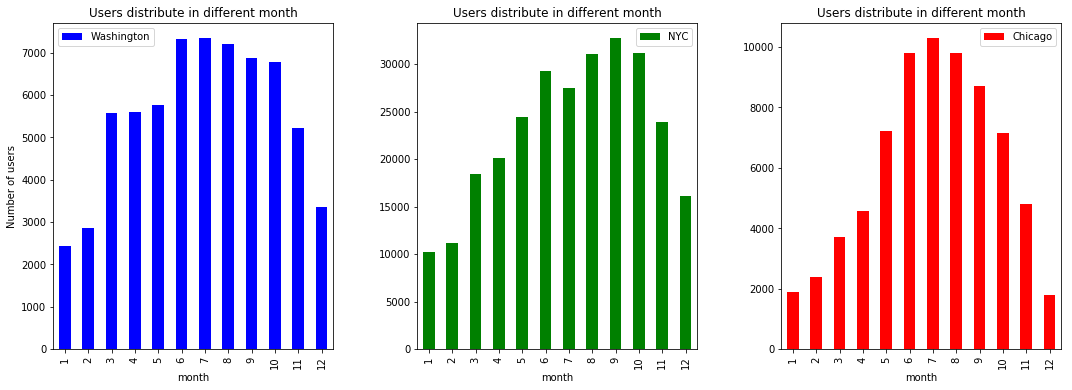

In [31]:
fig = plt.figure(figsize=(10,6))
plt.tight_layout()

ax1 = fig.add_subplot(131)
ax1 = month_counts['Washington'].plot(kind='bar', color='blue',label='Washington')
plt.xlabel('month')
plt.ylabel('Number of users')
plt.title('Users distribute in different month')
plt.legend()

ax2 = fig.add_subplot(132)
ax2 = month_counts['NYC'].plot(kind='bar',label='NYC',color='green')
plt.xlabel('month')
plt.title('Users distribute in different month')
plt.legend()

ax3 = fig.add_subplot(133)
ax3 = month_counts['Chicago'].plot(kind='bar',label='Chicago',color = 'red')
plt.xlabel('month')
plt.title('Users distribute in different month')
plt.legend()


plt.subplots_adjust(left=0.1,right=1.5,wspace=0.3)
plt.show();

### From the figures above we can know that:
- **Washington**'s highest ridership is in July, mostly users distribute from June to October , **NYC**'s highest ridership is in September, mostly users distribute from May to November; **Chicago**'s highest ridership is in July and mostly user distribute from May to October;

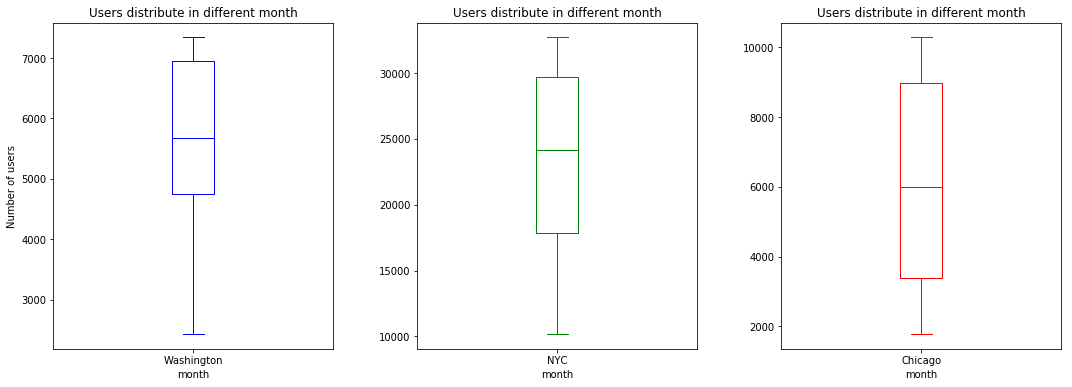

In [33]:
fig = plt.figure(figsize=(10,6))
plt.tight_layout()

ax1 = fig.add_subplot(131)
ax1 = month_counts['Washington'].plot(kind='box', color='blue',label='Washington')
plt.xlabel('month')
plt.ylabel('Number of users')
plt.title('Users distribute in different month')
plt.legend()

ax2 = fig.add_subplot(132)
ax2 = month_counts['NYC'].plot(kind='box',label='NYC',color='green')
plt.xlabel('month')
plt.title('Users distribute in different month')
plt.legend()

ax3 = fig.add_subplot(133)
ax3 = month_counts['Chicago'].plot(kind='box',label='Chicago',color = 'red')
plt.xlabel('month')
plt.title('Users distribute in different month')
plt.legend()
plt.subplots_adjust(left=0.1,right=1.5,wspace=0.3)
plt.show();

In [9]:
total_counts = US_bikeshare.groupby('city').count()['user_type']
total_counts

city
Chicago        72131
NYC           276081
Washington     66326
Name: user_type, dtype: int64

In [10]:
Washington_proportion = month_counts['Washington'] / total_counts['Chicago']
NYC_proportion = month_counts['NYC'] / total_counts['NYC']
Chicago_proportion = month_counts['Chicago'] / total_counts['Chicago']

In [11]:
ind = np.arange(len(Washington_proportion))
width = 0.35

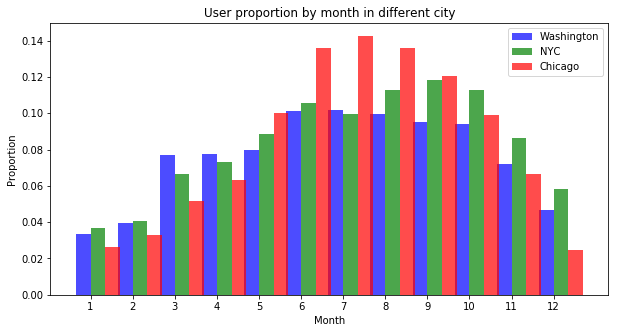

In [13]:
import matplotlib 
Washington_bars = plt.bar(ind, Washington_proportion, width, color='blue', alpha =.7, label = 'Washington')
NYC_bars = plt.bar(ind+width, NYC_proportion, width, color='green', alpha=.7, label = 'NYC')
Chicago_bars = plt.bar(ind+width+width, Chicago_proportion, width, color='red', alpha=.7, label='Chicago')
plt.ylabel('Proportion')
plt.xlabel('Month')
plt.title('User proportion by month in different city')
locations = ind + width / 2  # xtick locations
labels = ['1', '2', '3', '4', '5', '6', '7','8','9','10','11','12']  # xtick labels
plt.xticks(locations, labels)
# legend
plt.legend()
plt.show()
matplotlib.rc('figure', figsize=(10, 5));

### From the figure above we can compare the difference among three cities in each month.


In [14]:
df_user = US_bikeshare.groupby(['city','user_type','month']).count()['duration']

In [15]:
Washington_usertype = df_user['Washington']
NYC_usertype = df_user['NYC']
Chicago_usertype = df_user['Chicago']

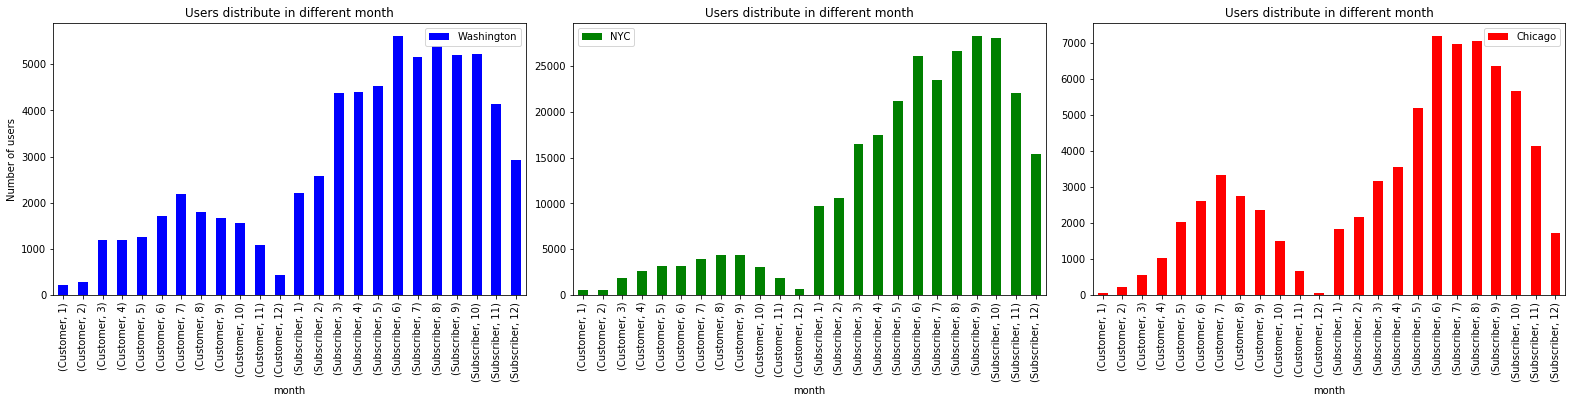

In [16]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(131)
ax1 = Washington_usertype.plot(kind='bar', color='blue',label='Washington')
plt.xlabel('month')
plt.ylabel('Number of users')
plt.title('Users distribute in different month')
plt.legend()

ax2 = fig.add_subplot(132)
ax2 = NYC_usertype.plot(kind='bar',label='NYC',color='green')
plt.xlabel('month')
plt.title('Users distribute in different month')
plt.legend()

ax3 = fig.add_subplot(133)
ax3 = Chicago_usertype.plot(kind='bar',label='Chicago',color = 'red')
plt.xlabel('month')
plt.title('Users distribute in different month')
plt.legend()

plt.subplots_adjust(left=0.1,right=1.5,wspace=0.1)
plt.show()

### From the figures above we can see that:
- **Washington**: Customer user mainly use the bike system during June to October; Subscriber users mainly use the bike system during March to November;
- **NYC**: Customer user mainly use the bike system during April to October; Subscriber users mainly use the bike system during May to November;
- **Chicago**: Customer user mainly use the bike system during May to September; Subscriber users mainly use the bike system during May to October;

In [17]:
hour_counts = US_bikeshare.groupby(['city','hour']).count()['user_type']

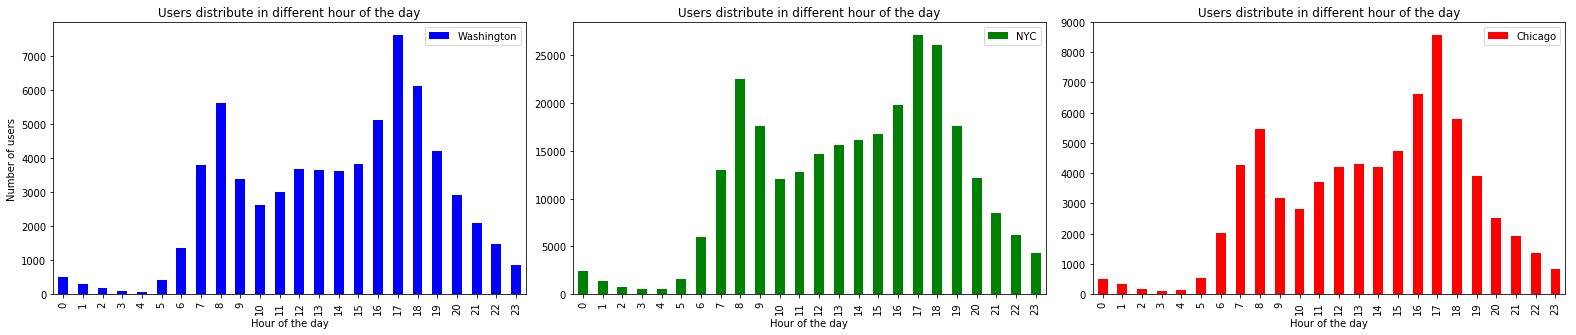

In [19]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(131)
ax1 = hour_counts['Washington'].plot(kind='bar', color='blue',label='Washington')
plt.xlabel('Hour of the day')
plt.ylabel('Number of users')
plt.title('Users distribute in different hour of the day')
plt.legend()

ax2 = fig.add_subplot(132)
ax2 = hour_counts['NYC'].plot(kind='bar',label='NYC',color='green')
plt.xlabel('Hour of the day')
plt.title('Users distribute in different hour of the day')
plt.legend()

ax3 = fig.add_subplot(133)
ax3 = hour_counts['Chicago'].plot(kind='bar',label='Chicago',color = 'red')
plt.xlabel('Hour of the day')
plt.title('Users distribute in different hour of the day')
plt.legend()

plt.subplots_adjust(left=0.1,right=1.5,wspace=0.1)
plt.show()

### From the figures above we can see that:
- **Washington**: The users mainly use the bike during 7:00-9:00 and 16:00-19:00; The highest user number appeara at 17:00;
- **NYC**: The users mainly use the bike during 7:00-9:00 and 15:00-19:00;The highest user number appeara at 17:00;
- **Chicago**: The users mainly use the bike during 7:00-9:00 and 15:00-19:00; The highest user number appeara at 17:00;

In [20]:
W_hour_proportion = hour_counts['Washington'] / total_counts['Chicago']
N_hour_proportion = hour_counts['NYC'] / total_counts['NYC']
C_hour_proportion = hour_counts['Chicago'] / total_counts['Chicago']

In [21]:
ind2 = np.arange(len(W_hour_proportion))
width = 0.35

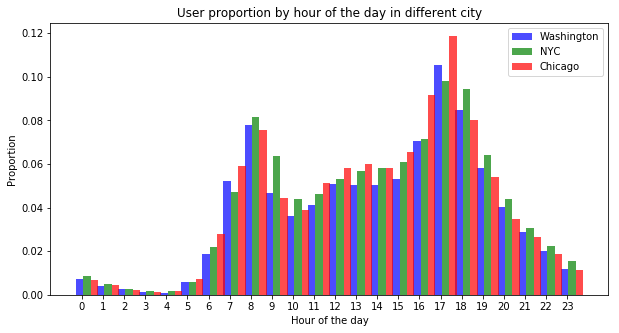

In [22]:
import matplotlib
W_hour_bars = plt.bar(ind2, W_hour_proportion, width, color='blue', alpha =.7, label = 'Washington')
N_hour_bars = plt.bar(ind2+width, N_hour_proportion, width, color='green', alpha=.7, label = 'NYC')
C_hour_bars = plt.bar(ind2+width+width, C_hour_proportion, width, color='red', alpha=.7, label='Chicago')
plt.ylabel('Proportion')
plt.xlabel('Hour of the day')
plt.title('User proportion by hour of the day in different city')
locations = ind2 + width / 3  # xtick locations
labels2 = ['0', '1', '2', '3', '4', '5', '6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']  # xtick labels
plt.xticks(locations, labels2)
# legend
plt.legend()
plt.show()
matplotlib.rc('figure', figsize=(10, 5));

### From the figure above we can compare the difference between 3 cities of the user for using the bike in different hour of the day.

In [23]:
hour_user = US_bikeshare.groupby(['city','user_type','hour']).count()['duration']

In [24]:
W_hour_usertype = hour_user['Washington']
N_hour_usertype = hour_user['NYC']
C_hour_usertype = hour_user['Chicago']

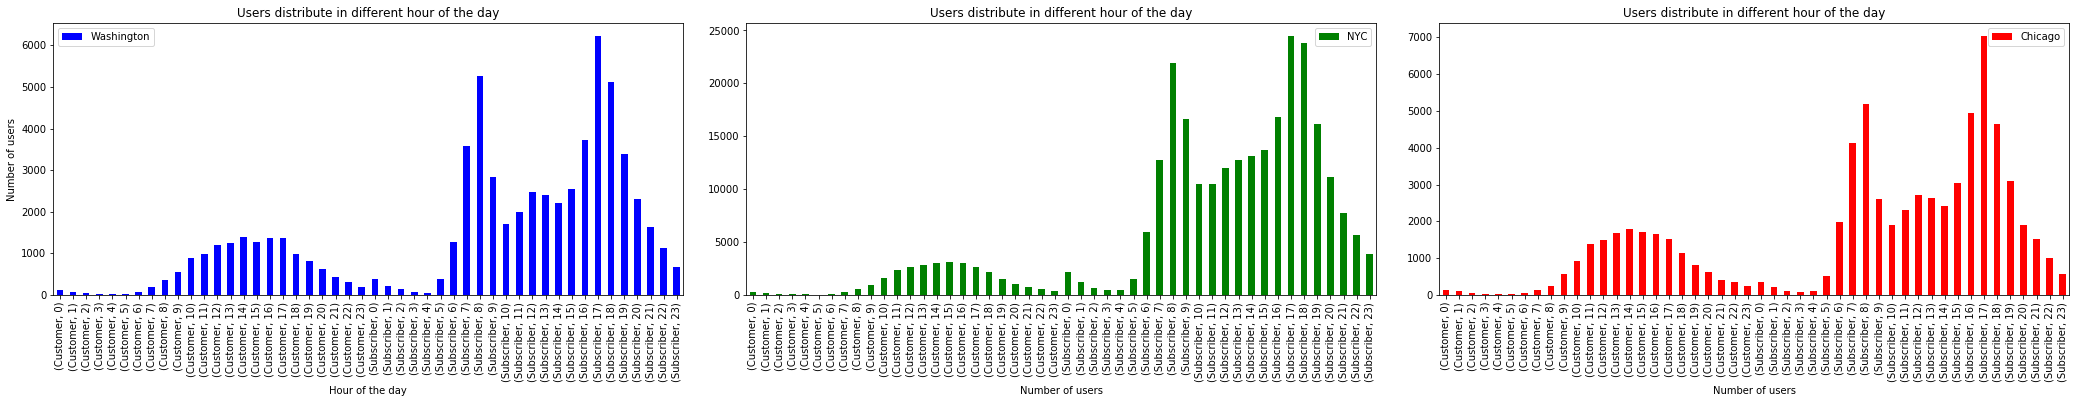

In [25]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1 = W_hour_usertype.plot(kind='bar', color='blue',label='Washington')
plt.xlabel('Hour of the day')
plt.ylabel('Number of users')
plt.title('Users distribute in different hour of the day')
plt.legend()

ax2 = fig.add_subplot(132)
ax2 = N_hour_usertype.plot(kind='bar',label='NYC',color='green')
plt.xlabel('Number of users')
plt.title('Users distribute in different hour of the day')
plt.legend()

ax3 = fig.add_subplot(133)
ax3 = C_hour_usertype.plot(kind='bar',label='Chicago',color = 'red')
plt.xlabel('Number of users')
plt.title('Users distribute in different hour of the day')
plt.legend()

plt.subplots_adjust(left=0.1,right=1.5,wspace=0.1)
plt.show()

### From the figures above we can see that:
- **Washington**: For Customer users, they mainly use the bike during 10:00 - 19:00, and the highest users number appears at 14:00, while for Subscriber users, they mainly use the bike during 7:00-9:00 and 16:00-19:00, which maybe they ride the bike to work and back home; 
- **NYC**: For Customer users, they mainly use the bike during 11:00 - 18:00, and the highest users number appears at 14:00, while for Subscriber users, they mainly use the bike during 7:00-9:00 and 16:00-19:00, which maybe they ride the bike to work and back home; 
- **Chicago**： For Customer users, they mainly use the bike during 11:00 - 17:00, and the highest users number appears at 14:00, while for Subscriber users, they mainly use the bike during 7:00-8:00 and 16:00-18:00, which maybe they ride the bike to work and back home; 

In [26]:
week_counts = US_bikeshare.groupby(['city','day_of_week']).count()['user_type']

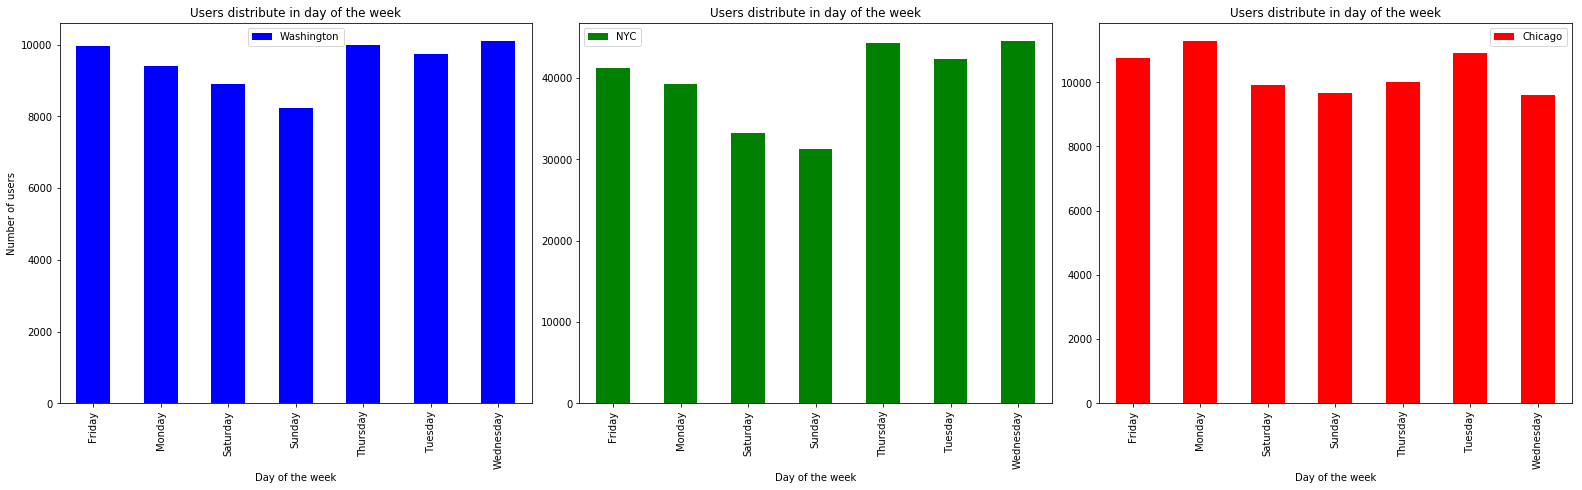

In [27]:
fig = plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(131)
ax1 = week_counts['Washington'].plot(kind='bar', color='blue',label='Washington')
plt.xlabel('Day of the week')
plt.ylabel('Number of users')
plt.title('Users distribute in day of the week')
plt.legend()

ax2 = fig.add_subplot(132)
ax2 = week_counts['NYC'].plot(kind='bar',label='NYC',color='green')
plt.xlabel('Day of the week')
plt.title('Users distribute in day of the week')
plt.legend()

ax3 = fig.add_subplot(133)
ax3 = week_counts['Chicago'].plot(kind='bar',label='Chicago',color = 'red')
plt.xlabel('Day of the week')
plt.title('Users distribute in day of the week')
plt.legend()

plt.subplots_adjust(left=0.1,right=1.5,wspace=0.1)
plt.show()

### From the figure above we can see that: 
- The users during weekdays more than during weekends in three cities；

In [28]:
W_day_proportion = week_counts['Washington'] / total_counts['Chicago']
N_day_proportion = week_counts['NYC'] / total_counts['NYC']
C_day_proportion = week_counts['Chicago'] / total_counts['Chicago']

In [29]:
ind3 = np.arange(len(W_day_proportion))
width = 0.35
ind3

array([0, 1, 2, 3, 4, 5, 6])

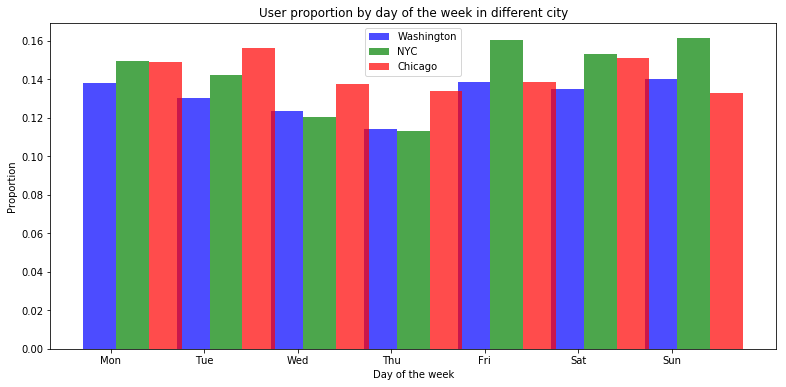

In [44]:
import matplotlib
W_day_bars = plt.bar(ind3, W_day_proportion, width, color='blue', alpha =.7, label = 'Washington')
N_day_bars = plt.bar(ind3+width, N_day_proportion, width, color='green', alpha=.7, label = 'NYC')
C_day_bars = plt.bar(ind3+width+width, C_day_proportion, width, color='red', alpha=.7, label='Chicago')
plt.ylabel('Proportion')
plt.xlabel('Day of the week')
plt.title('User proportion by day of the week in different city')
locations = ind3 + width / 3  # xtick locations
labels2 = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']  # xtick labels
plt.xticks(locations, labels2)
# legend
plt.legend()
plt.show()
matplotlib.rc('figure', figsize=(13, 6));

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: 
- For me I may choose the field related to finance. I'd like to learn how to use financial data to spot trends and extrapolate into the future which can help the employers and clients make the best investing decisioins.
